In [1]:
import pandas as pd

df = pd.read_csv('Assignment_Wine_data\OSX_DS_assignment.csv')

df.head()


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [2]:
df.shape

(103322, 12)

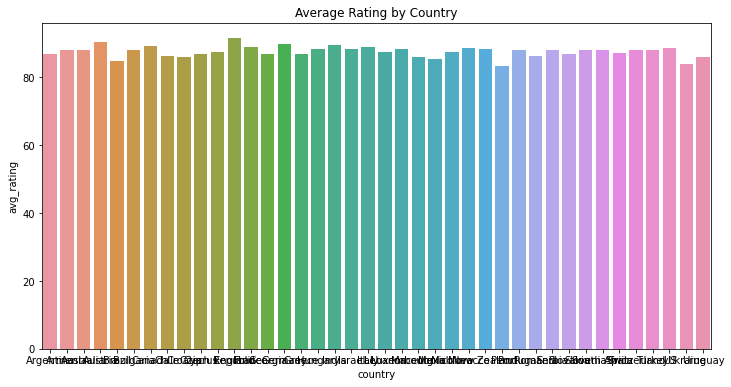

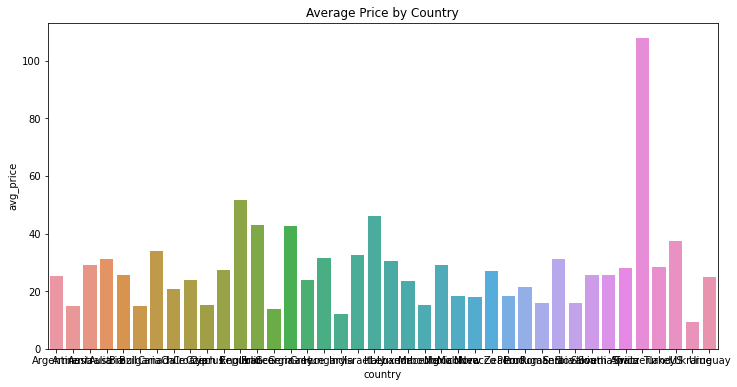

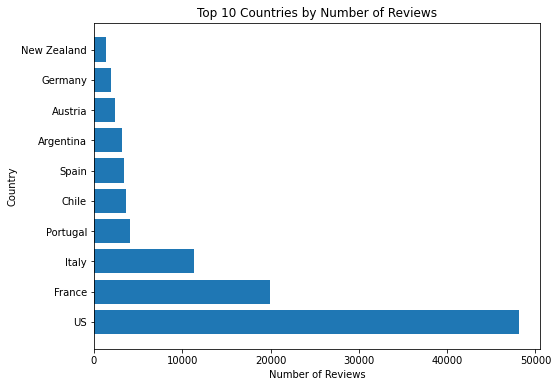

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine_data = df

# Group the data by country and calculate the average rating and price for each country
country_data = wine_data.groupby(['country']).agg(
    {'points': 'mean', 'price': 'mean', 'winery': 'count'}).reset_index()
country_data.columns = ['country', 'avg_rating', 'avg_price', 'num_reviews']

# Create a bar chart to visualize the average rating and price for each country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='avg_rating', data=country_data)
plt.title("Average Rating by Country")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='avg_price', data=country_data)
plt.title("Average Price by Country")
plt.show()

# Group the data by province within each country
province_data = wine_data.groupby(['country', 'province']).agg(
    {'points': 'mean', 'price': 'mean', 'winery': 'count'}).reset_index()
province_data.columns = ['country', 'province',
                         'avg_rating', 'avg_price', 'num_reviews']

# Create a bar chart to visualize the average rating and price for each province
# plt.figure(figsize=(12, 6))
# sns.barplot(x='province', y='avg_rating', data=province_data)
# plt.title("Average Rating by Province")
# plt.xticks(rotation=90)
# plt.show()

# plt.figure(figsize=(40, 6))
# sns.barplot(x='province', y='avg_price', data=province_data)
# plt.title("Average Price by Province")
# plt.xticks(rotation=90)
# plt.show()
# Create a bar chart to visualize the average rating and price for each province
# plt.figure(figsize=(12, 6))
# sns.barplot(x='province', y='avg_rating', data=province_data)
# plt.title("Average Rating by Province")
# plt.xticks(rotation=45, ha='right')  # adjust rotation and horizontal alignment
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.barplot(x='province', y='avg_price', data=province_data)
# plt.title("Average Price by Province")
# plt.xticks(rotation=45, ha='right')  # adjust rotation and horizontal alignment
# plt.show()

# Get the top 10 countries by the number of reviews
top_countries = wine_data['country'].value_counts().nlargest(10)

# Create a horizontal bar chart to visualize the number of reviews by country
plt.figure(figsize=(8, 6))
plt.barh(top_countries.index, top_countries.values)
plt.title("Top 10 Countries by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Country")
plt.show()


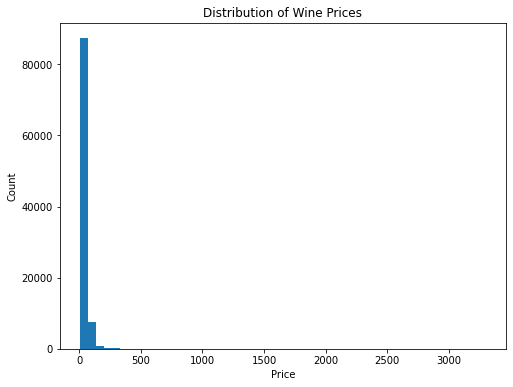

In [8]:
# Create a histogram to visualize the distribution of wine prices
plt.figure(figsize=(8, 6))
plt.hist(wine_data['price'], bins=50)
plt.title("Distribution of Wine Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


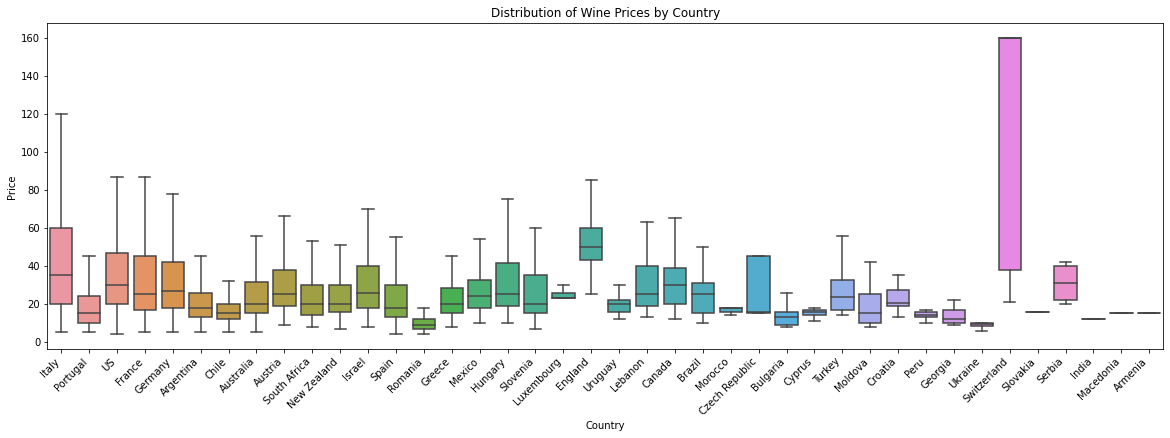

In [11]:
# Create a boxplot to compare the distribution of wine prices by country
plt.figure(figsize=(20, 6))
sns.boxplot(x='country', y='price', data=wine_data, showfliers=False)
plt.title("Distribution of Wine Prices by Country")
plt.xlabel("Country")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')
plt.show()


In [51]:
# Calculate the average rating for wines by country for top 10 countries
country_ratings = wine_data.groupby('country')['points'].mean().reset_index()
country_ratings = country_ratings.sort_values(by='points', ascending=False)
print(country_ratings.head(10))


    country     points
11  England  91.581081
3   Austria  90.312060
14  Germany  89.970165
17    India  89.500000
6    Canada  89.311321
19    Italy  88.943975
12   France  88.871363
25  Morocco  88.695652
37       US  88.621830
16  Hungary  88.440000


In [53]:
# Calculate the average rating for wines by country for last 10 countries
country_ratings = wine_data.groupby('country')['points'].mean().reset_index()
country_ratings = country_ratings.sort_values(by='points', ascending=True)
print(country_ratings.head(10))


      country     points
27       Peru  83.250000
38    Ukraine  83.833333
4      Brazil  84.783784
23     Mexico  85.333333
22  Macedonia  86.000000
8     Croatia  86.000000
39    Uruguay  86.025000
29    Romania  86.240000
7       Chile  86.468595
0   Argentina  86.809613


In [13]:
# Calculate the average rating for wines by province
province_ratings = wine_data.groupby('province')['points'].mean().reset_index()
province_ratings = province_ratings.sort_values(by='points', ascending=False)
print(province_ratings.head(10))


            province     points
299    Südburgenland  93.000000
316           Tokaji  92.000000
187      Mittelrhein  92.000000
254      Puente Alto  91.733333
346           Wachau  91.723724
104          England  91.581081
275       Santa Cruz  91.500000
145          Kamptal  91.466830
25   Beira Atlantico  91.333333
317       Traisental  91.255814


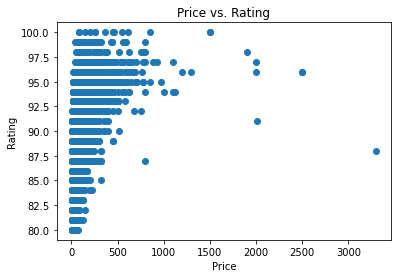

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot of price vs. rating
plt.scatter(wine_data['price'], wine_data['points'])
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


In [17]:
correlation = wine_data['price'].corr(wine_data['points'])
print(f"Correlation between price and rating: {correlation}")


Correlation between price and rating: 0.415651163642704


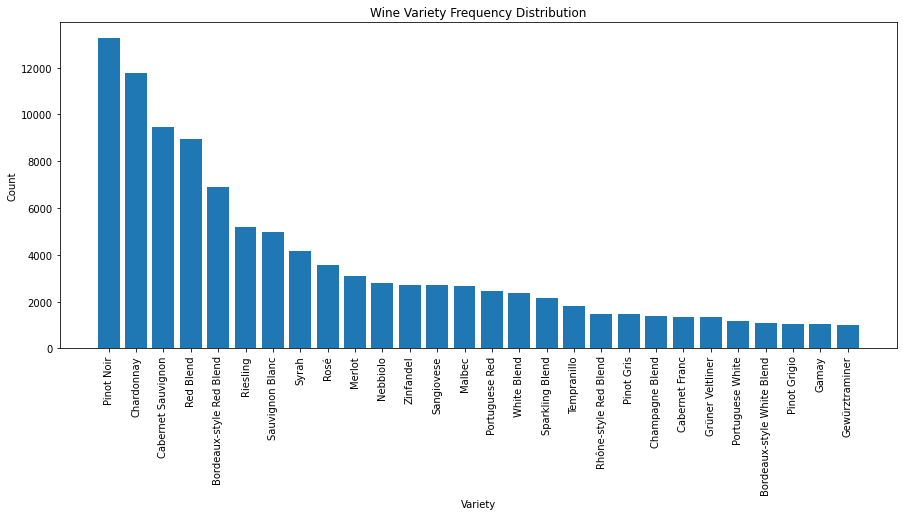

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine data into a DataFrame

# Compute the frequency distribution of wine varieties
variety_counts = wine_data['variety'].value_counts()
plt.figure(figsize=(15, 6))
# Create a bar chart of the frequency distribution
plt.bar(variety_counts.index, variety_counts.values)
plt.xticks(rotation=90)
plt.title('Wine Variety Frequency Distribution')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.show()


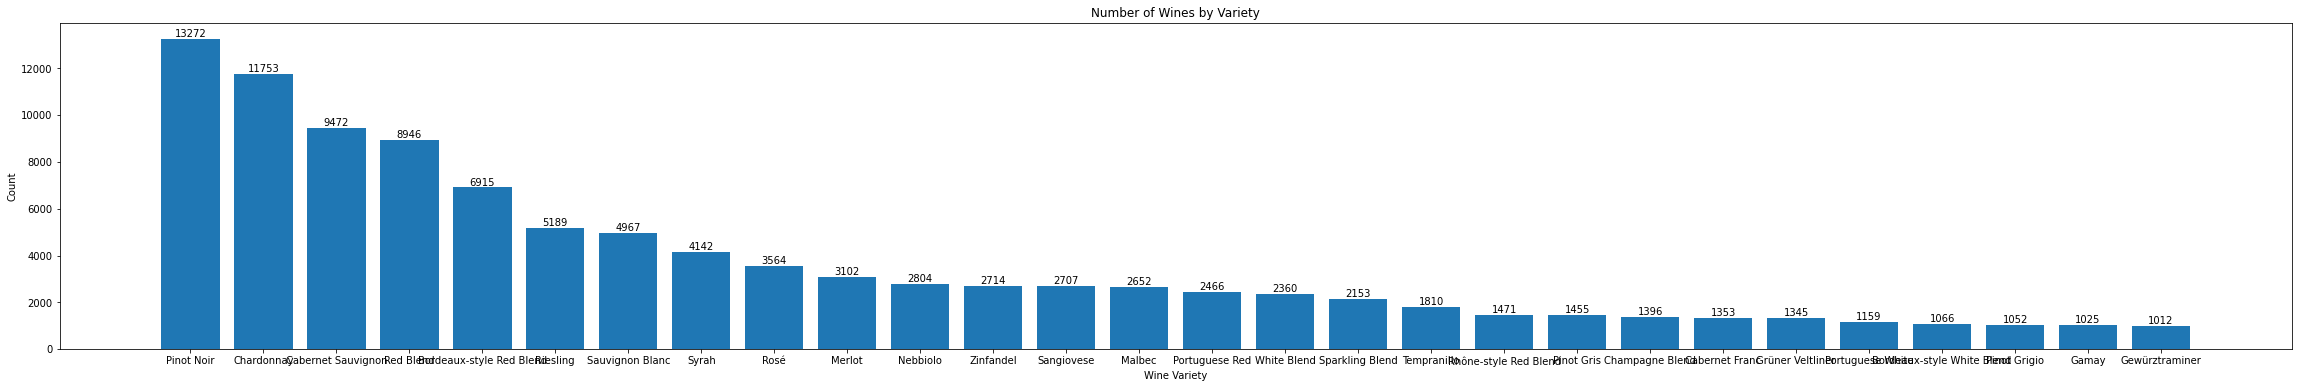

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = df
# Get the counts for each variety
variety_counts = data["variety"].value_counts()

# Create a bar plot of variety counts
plt.figure(figsize=(40, 6))
plt.bar(variety_counts.index, variety_counts.values)

# Add labels and title
plt.xlabel("Wine Variety")
plt.ylabel("Count")
plt.title("Number of Wines by Variety")

# Add the counts to the bars
for i, v in enumerate(variety_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


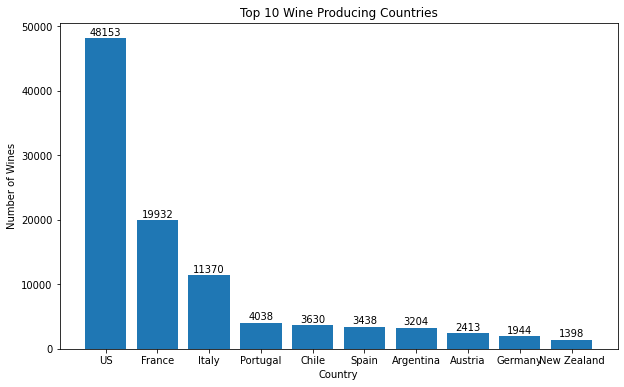

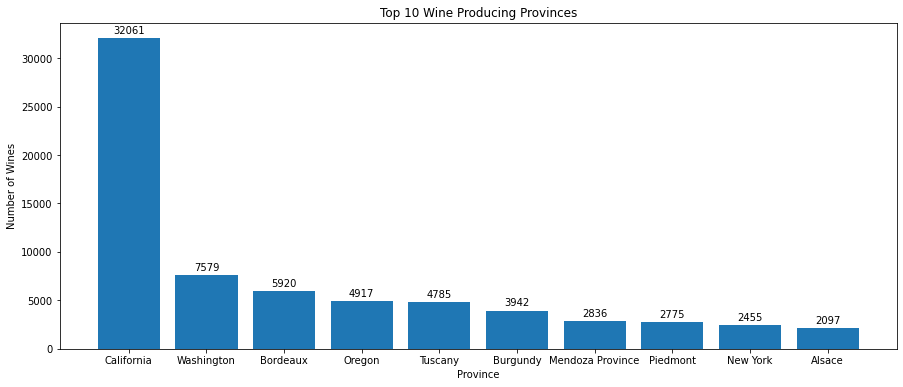

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the number of wines produced by each country
country_counts = df['country'].value_counts()

# Plot the top 10 countries by wine production
top_countries = country_counts[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values)
plt.title('Top 10 Wine Producing Countries')
plt.xlabel('Country')
plt.ylabel('Number of Wines')

# Add count labels to the top of each bar
for i, v in enumerate(top_countries.values):
    plt.text(i, v+500, str(v), ha='center')

plt.show()

# Calculate the number of wines produced by each province
province_counts = df['province'].value_counts()
# Plot the top 10 provinces by wine production
top_provinces = province_counts[:10]
plt.figure(figsize=(15, 6))
plt.bar(top_provinces.index, top_provinces.values)
plt.title('Top 10 Wine Producing Provinces')
plt.xlabel('Province')
plt.ylabel('Number of Wines')

# Add count labels to the top of each bar
for i, v in enumerate(top_provinces.values):
    plt.text(i, v+500, str(v), ha='center')

plt.show()


<AxesSubplot:xlabel='price', ylabel='points'>

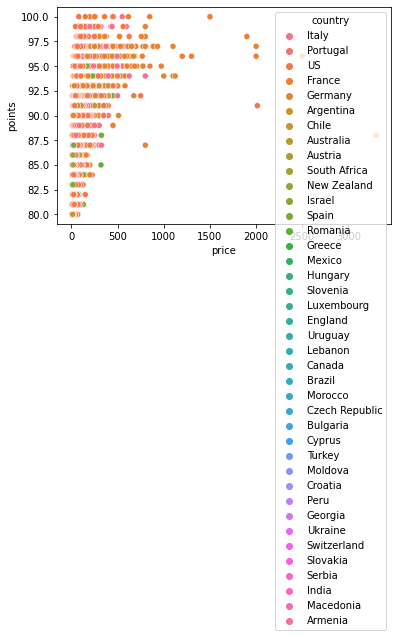

In [40]:
sns.scatterplot(data=df, x='price', y='points', hue='country')


<AxesSubplot:xlabel='price', ylabel='country'>

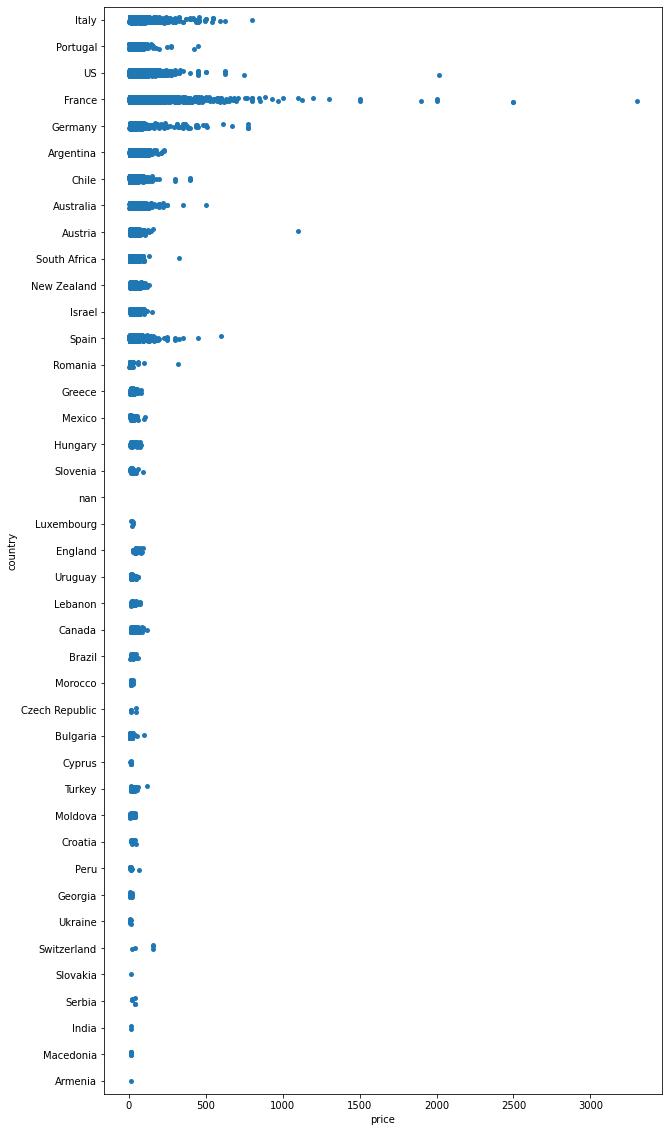

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))  # adjust the size of the plot

sns.stripplot(data=df, y='country', x='price', jitter=True)


<AxesSubplot:xlabel='variety', ylabel='price'>

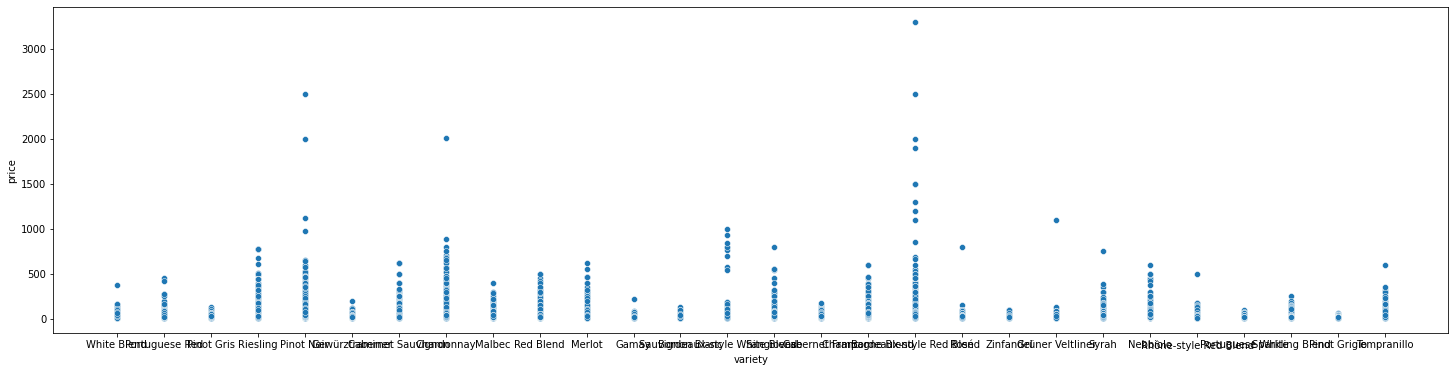

In [44]:
import seaborn as sns
plt.figure(figsize=(25, 6))
sns.scatterplot(data=df, x="variety", y="price")


<AxesSubplot:xlabel='price', ylabel='points'>

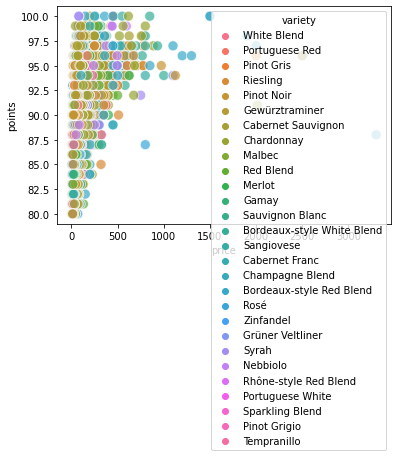

In [45]:
import seaborn as sns

sns.scatterplot(data=wine_data, x="price", y="points",
                hue="variety", alpha=0.7, s=100)


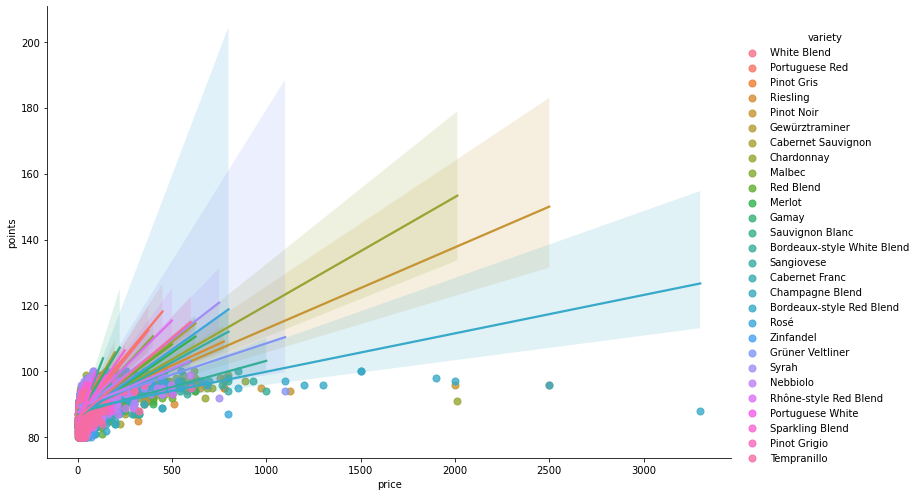

In [47]:
import seaborn as sns

sns.lmplot(data=wine_data, x="price", y="points", hue="variety", height=7,
           aspect=1.5, scatter_kws={"s": 50})


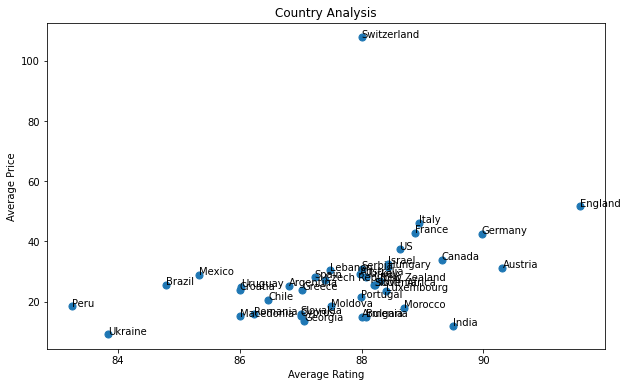

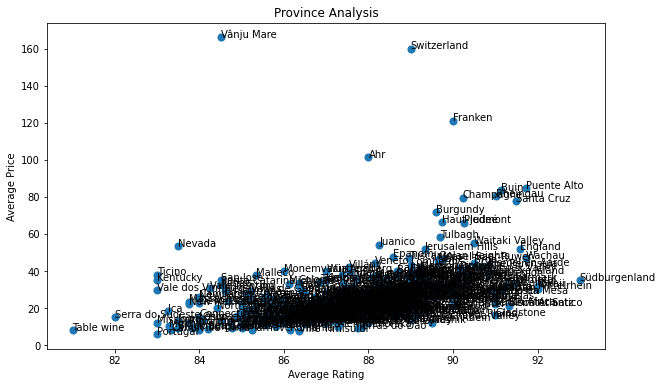

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Group the data by country and calculate the mean of ratings and price
country_data = wine_data.groupby('country').agg(
    {'points': 'mean', 'price': 'mean'})

# Scatter plot for country vs rating
plt.figure(figsize=(10, 6))
plt.scatter(country_data['points'], country_data['price'], s=50)
plt.xlabel('Average Rating')
plt.ylabel('Average Price')
plt.title('Country Analysis')
for i, txt in enumerate(country_data.index):
    plt.annotate(txt, (country_data['points'][i], country_data['price'][i]))
plt.show()

# Group the data by province and calculate the mean of ratings and price
province_data = wine_data.groupby('province').agg(
    {'points': 'mean', 'price': 'mean'})

# Scatter plot for province vs rating
plt.figure(figsize=(10, 6))
plt.scatter(province_data['points'], province_data['price'], s=50)
plt.xlabel('Average Rating')
plt.ylabel('Average Price')
plt.title('Province Analysis')
for i, txt in enumerate(province_data.index):
    plt.annotate(txt, (province_data['points'][i], province_data['price'][i]))
plt.show()


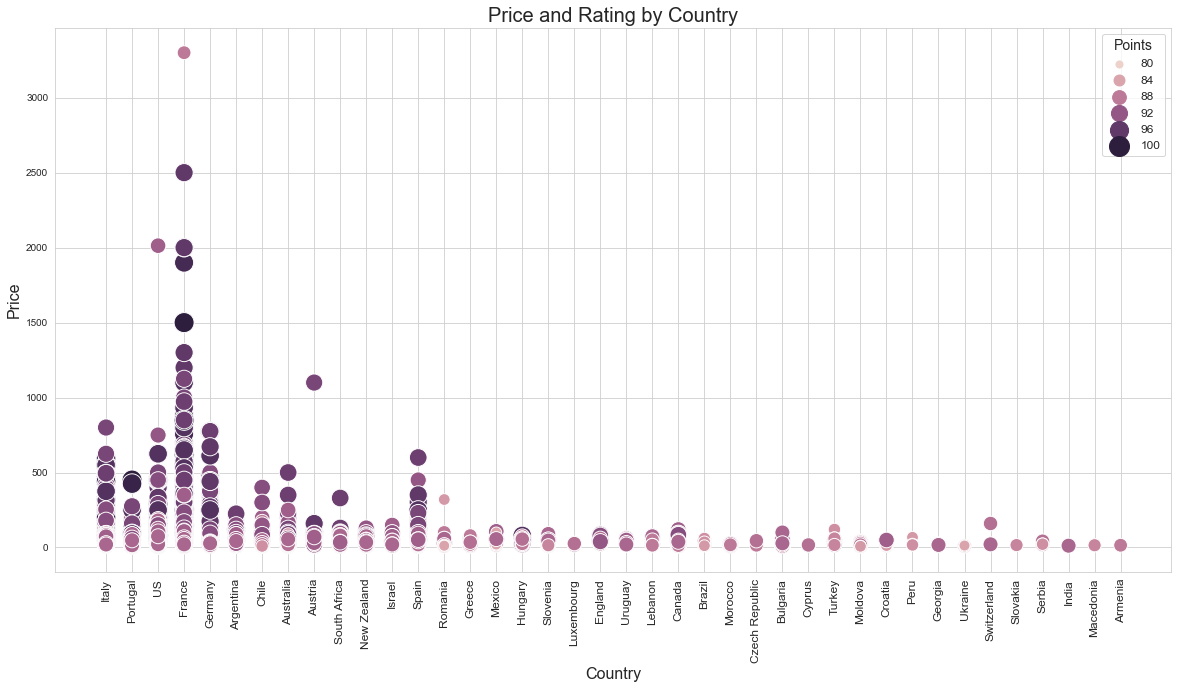

In [49]:
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='country', y='price',
                hue='points', size='points', sizes=(50, 400))
plt.title("Price and Rating by Country", fontsize=20)
plt.xlabel("Country", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.legend(title='Points', loc='upper right', fontsize=12, title_fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()


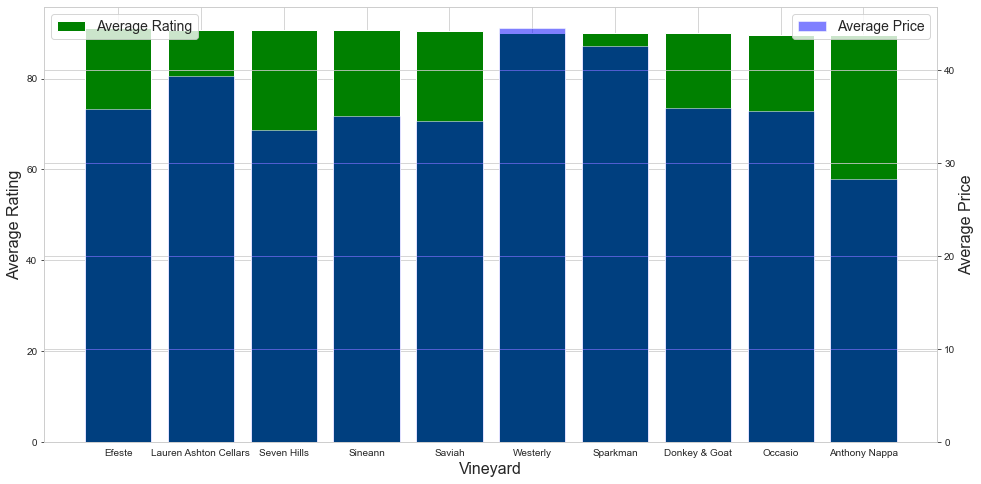

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame

# Group the data by vineyard and calculate the average rating and price
vineyard_stats = df.groupby('winery').agg(
    {'points': 'mean', 'price': 'mean', 'variety': 'nunique'})

# Filter out vineyards with less than 10 unique varieties
vineyard_stats = vineyard_stats[vineyard_stats['variety'] >= 10]

# Sort the data by rating and price
vineyard_stats = vineyard_stats.sort_values(
    ['points', 'price'], ascending=[False, True])

# Get the top 10 vineyards by rating and price
top_vineyards = vineyard_stats.head(10)

# Plot a bar chart of the data
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(top_vineyards.index,
       top_vineyards['points'], color='green', label='Average Rating')
ax.set_ylabel('Average Rating', fontsize=16)
ax.set_xlabel('Vineyard', fontsize=16)
ax2 = ax.twinx()
ax2.bar(top_vineyards.index,
        top_vineyards['price'], color='blue', alpha=0.5, label='Average Price')
ax2.set_ylabel('Average Price', fontsize=16)
ax.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()


In [60]:
# Calculate the average rating for wines by province
province_ratings = wine_data.groupby('province')['points'].mean().reset_index()
province_ratings = province_ratings.sort_values(by='points', ascending=False)
print(province_ratings.head(20))


            province     points
299    Südburgenland  93.000000
316           Tokaji  92.000000
187      Mittelrhein  92.000000
254      Puente Alto  91.733333
346           Wachau  91.723724
104          England  91.581081
275       Santa Cruz  91.500000
145          Kamptal  91.466830
25   Beira Atlantico  91.333333
317       Traisental  91.255814
27            Beiras  91.166667
37              Buin  91.125000
259         Rheingau  91.006431
287     South Africa  91.000000
36           Bucelas  91.000000
244  Piekenierskloof  91.000000
117        Gladstone  91.000000
341    Vinho da Mesa  91.000000
150         Kremstal  90.899408
347           Wagram  90.890909


In [64]:
import pandas as pd

# Drop any rows with missing values in price or points columns
df.dropna(subset=['price', 'points'], inplace=True)

# Calculate the Pearson correlation coefficient
r = df['price'].corr(df['points'], method='pearson')

print("The Pearson correlation coefficient between wine prices and ratings is:", r)


The Pearson correlation coefficient between wine prices and ratings is: 0.415651163642704


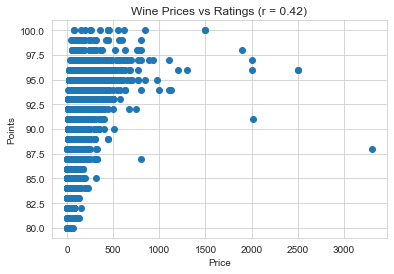

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop any rows with missing values in price or points columns
df.dropna(subset=['price', 'points'], inplace=True)

# Calculate the Pearson correlation coefficient
r = df['price'].corr(df['points'], method='pearson')

# Create a scatter plot of wine prices and ratings
plt.scatter(df['price'], df['points'])
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Wine Prices vs Ratings (r = {:.2f})'.format(r))
plt.show()


In [66]:
wine_df = df
high_price_high_points = wine_df[(
    wine_df['price'] > 200) & (wine_df['points'] > 90)]

wine_names = high_price_high_points[['winery', 'variety', 'price', 'points']]

print(wine_names)


                            winery                   variety  price  points
220                     Viña Cobos                    Malbec  215.0      92
264                    Robert Weil                  Riesling  775.0      97
267                   Louis Latour                Chardonnay  630.0      96
268                    Robert Weil                  Riesling  365.0      96
270             Château de la Tour                Pinot Noir  350.0      95
...                            ...                       ...    ...     ...
101398                Louis Latour                Pinot Noir  350.0      91
101957        Dr. Pauly Bergweiler                  Riesling  250.0      97
102541                      Verité  Bordeaux-style Red Blend  450.0      93
102748                      Montes                 Red Blend  300.0      93
103081  Jean-Luc and Paul Aegerter                Chardonnay  235.0      93

[544 rows x 4 columns]


In [67]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir
5,@vossroger,France,Trimbach 2012 Gewurztraminer (Alsace),This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Trimbach,Gewürztraminer


In [68]:
!pip install nltk

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 259.2 kB/s eta 0:00:06
                                              0.0/1.5 MB 259.2 kB/s eta 0:00:06
                                              0.0/1.5 MB 259.2 kB/s eta 0:00:06
     -                                        0.0/1.5 MB 122.9 kB/s eta 0:00:12
     -                                   


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install textblob

                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/636.8 kB ? eta -:--:--
                                              0.0/6


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd
import nltk
from textblob import TextBlob

# download the NLTK corpus
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# define a function to extract the sentiment polarity score


def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


# apply the function to the review_description column
wine_df['sentiment_score'] = wine_df['review_description'].apply(get_sentiment)

# print the first 5 rows of the DataFrame with the new sentiment_score column
print(wine_df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     user_name   country                                       review_title  \
1   @vossroger  Portugal      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2  @paulgwine         US      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3          NaN        US  St. Julian 2013 Reserve Late Harvest Riesling ...   
4  @paulgwine         US  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
5   @vossroger    France              Trimbach 2012 Gewurztraminer (Alsace)   

                                  review_description  \
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   
5  This dry and restrained wine offers spice in p...   

                          designation  points  price  province  \
1                            Avidagos      87   15.0     Douro   
2                                 NaN      87   14.0    

In [74]:
from textblob import TextBlob
reviews = df
# Calculate sentiment score for each review
reviews['sentiment'] = reviews['review_description'].apply(
    lambda x: TextBlob(x).sentiment.polarity)

# Calculate mean sentiment score for each wine variety
variety_sentiment = reviews.groupby(
    'variety')['sentiment'].mean().sort_values(ascending=False)

print(variety_sentiment.head(10))


variety
Portuguese White              0.276674
Bordeaux-style White Blend    0.244712
Gewürztraminer                0.238431
Champagne Blend               0.231577
Pinot Gris                    0.212295
Rosé                          0.205779
Grüner Veltliner              0.202548
Chardonnay                    0.198371
Pinot Grigio                  0.194378
Sparkling Blend               0.184504
Name: sentiment, dtype: float64


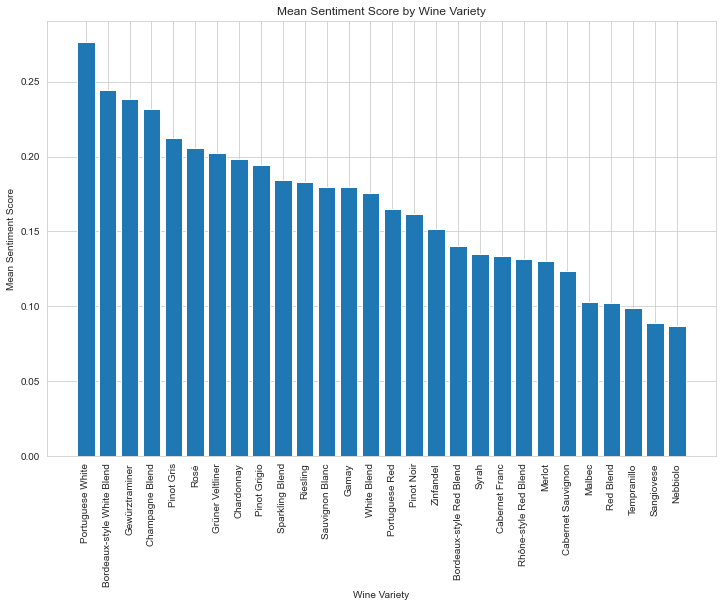

In [75]:
import matplotlib.pyplot as plt

# Calculate mean sentiment score for each wine variety
variety_sentiment = reviews.groupby(
    'variety')['sentiment'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(variety_sentiment.index, variety_sentiment.values)
plt.xticks(rotation=90)
plt.title('Mean Sentiment Score by Wine Variety')
plt.xlabel('Wine Variety')
plt.ylabel('Mean Sentiment Score')
plt.show()


C:\Users\saisu\AppData\Local\Temp\ipykernel_6112\2611554444.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter)


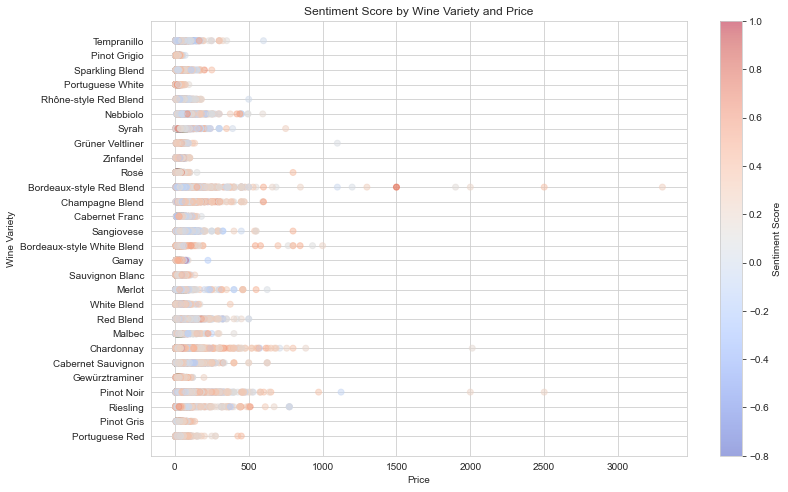

In [85]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot
scatter = ax.scatter(reviews['price'], reviews['variety'],
                     c=reviews['sentiment'], cmap='coolwarm', alpha=0.5)

# Set plot title and axis labels
ax.set_title('Sentiment Score by Wine Variety and Price')
ax.set_xlabel('Price')
ax.set_ylabel('Wine Variety')

# Add colorbar legend
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Sentiment Score')

# Show the plot
plt.show()
